# Whats the most efficient way to drive a car

## Project plan

### Week 1: 27th - 31st Jan, Week 2: 3rd -7th  Feb

Development of a simple model:
Testing vehicle dynamics.
Comparing real world data to the model.

Development of a model to build the vehicle dynamics. This is done by devloping a simple system to achieve the same 0-62 mph time of a ford fiesta

### Week 3: 10th - 14th  Feb, Week 4: 17th - 21st Feb

Optimisation of the simple model.
Streamline code to improve runtime and accuracy

### Week 5: 24th - 28th Feb, Week 6: 3rd - 7th Mar

Development of a more complex model.
Add target average velocity and time constraints.

### Week 7: 10-14th Mar, Week 8: 17th - 21st Mar

Optimisation of the complex model.
Improve runtime and accuracy

### Week 9: 24th - 28th Mar, Week 10: 28th Apr - 2nd May

Development of a model using machine learning:
Investigate features for the machine learning model, such as fuel efficiency, braking distance, or stability in dynamic scenarios.

### Week 11: 5th - 9th May

Optimisation of a machine learning model:
Conduct an evaluation comparing the machine learning model’s predictions with the physics-based model.

## Week 1:

Date: 29/01/25

### Supervisor meeting

Supervisor: Prof. Simon Dye

What was Discussed:
1. Different approaches to answer the question 'What is the most efficient way to drive a car?', the use of machine learning model or a finite difference model.
2. Project Plan.
3. What car to use to model the invistigation on.


What was agreed upon/to do:
1. Use of a ford fiesta to model the investiagtion on.
2. The use of finite difference modelling to answer the question and comparison with a machine learning model if there is time at the end.
2. Research data for a ford fiesta (i.e, Engine power,  car mass , 0-62mph time, max speed)
3. Build a model to test the manufactures claimed 0-62mph time
4. Build a model to test the manufactures claimed max speed:

The reason a ford fiesta was the chosen was the amount of easily accesible information avaliable about it which isn't true for other cars. 

In [1]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt

 Date: 30/01/25

I’ve developed a model that seeks to match the manufacturer’s claimed 0–62 mph time for the Ford Fiesta 1.1L.  the model simulates the forces acting on the car throughout its acceleration, enabling a close estimation of its published performance.

Data of the drag coefficient, frontal area and engine power of the vehicle were taken from a document from the manufacturer [1].

In [99]:
#simple model to test the claimed 0-100kmh time
p = 51485
v = 0.1

c_drag = 0.321
air = 1.225
area = 2.15

m = 1620
dt = 0.01
time = 0
g = 9.81
N = g * m

while v <= 27.78:
    f_drive = p/v
    f_drag = 0.5*c_drag*air*area*(v**2)
    f_rr = 0.01*N
    f_net = f_drive - f_drag - f_rr 
    a = f_net/m
    v += a*dt
    time += dt
    
print(time)

13.84999999999975


The simulation gives a 0–100 km/h time of 13.85s, compared to the manufacturer's claim [1] of 14.90s this represents  a 7.05% diffrence. The difference is due to idealised conditions — full power is applied instantly, with no engine mapping, gear changes, or real-world losses included. The result is reasonable given the simplified model.

## Velocity time curve

This graph is used to estimate the terminal velocity of the Ford Fiesta.

Text(0, 0.5, 'Velocity (m/s)')

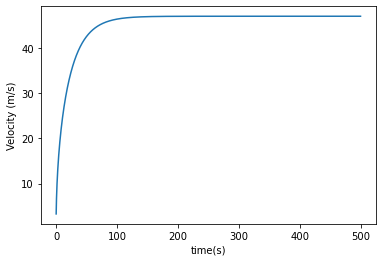

In [100]:
time = []
velocity= []
t = 0
v = 0.1

while t < 500:
    f_drive = p/v
    f_drag = 0.5*c_drag*air*area*(v**2)
    f_rr = 0.01*N
    f_net = f_drive - f_drag - f_rr 
    a = f_net/m
    v += a*dt
    t += dt
    velocity.append(v)
    time.append(t)
    
plt.plot(time, velocity)
plt.xlabel('time(s)')
plt.ylabel(r"Velocity (m/s)")

In [101]:
print(f'The terminal velocity is {max(velocity):.2f} m/s')

The terminal velocity is 47.04 m/s


The simulation estimates a terminal velocity of 47.04 m/s (169.34 km/h), compared to the manufacturer’s claimed 44.44 m/s (160 km/h). The small difference may be due to simplified drag modelling and the absence of engine or aerodynamic limitations at high speeds. Overall, the result is reasonably close and supports the validity of the model.

## Week 2:

Date: 5/02/25
### Supervisor Meeting
Supervisor: Prof. Simon Dye

What was discussed:
1. The results of 0-62 mph time, and the terminal velocity and talks on there validity
2. Simulate a journey on a flat terrain to see if the vehicle dynamics are working sensibly.
3. add a check for rolling resitance at low speeds to prevent it rolling back.
4. How different road profiles would be moddelled and how the effects of gravity.
5. How to find power rpm curves and a gear module and there implmentation.

what was agreed upon/ to be done:
1. Simulate a journey
2. Rolling resitance check at low speeds
3. Modelling power rpm curves.
4. creation of a gear module
5. addition of grvaity 

### Date: 5/02/25

## simulating a journey

Simulating how long it will take for the car to complete a journey of 1km on completely flat terrain.

35.22000000000156


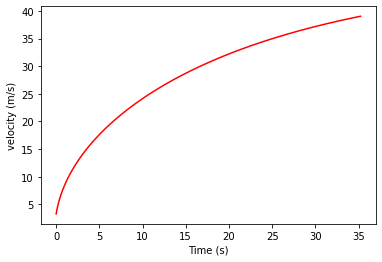

In [102]:
t = 0
v = 0.1
d = 0
a = 0
dt = 0.01

distance=[]
time = []
velocity= []

while d < 1000:
    f_drive = p/v
    f_drag = 0.5*c_drag*air*area*(v**2)
    f_rr = 0.01*N
    f_net = f_drive - f_drag - f_rr 
    
    a = f_net/m
    v += a*dt
    t += dt
    d += v*dt
    
    velocity.append(v)
    distance.append(d)
    time.append(t)
    
plt.plot(time,velocity,'r')
plt.xlabel('Time (s)')
plt.ylabel('velocity (m/s)')
print(t)    

A time of 35.22 seconds to travel 1 km is reasonable for motorway driving on a flat terrain, reflecting an average speed of 102.20 km/h, which aligns with typical motorway speeds.

The graph shows velocity increasing over time, starting around 4 m/s and reaching just under 40 m/s. The curve suggests the car accelerates quickly at first, then more gradually—consistent with real-world acceleration affected by drag or engine limits.

Text(0, 0.5, 'Distance (m)')

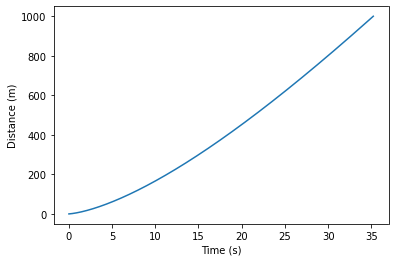

In [103]:
plt.plot(time,distance)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

This Graph validates that the journey travels 1000m in 35.22s

### addition of a check such that when V = 0 the rolling resistance is ignored.

The reason for this check is to make sure the car doesn't go backwards when there is no power.

In [104]:
t = 0
v = 0.1
d = 0
while d < 1000:
    f_drive = p/v
    f_drag = 0.5*c_drag*air*area*(v**2)
    f_rr = 0.01*N
    # Ignore rolling resistance at very low speeds to prevent backward motion
    if 0 < v < 1: 
        f_net = f_drive - f_drag
    else:
        f_net = f_drive - f_drag - f_rr
    
    a = f_net/m
    v += a*dt
    t += dt
    d += v*dt 
    
print(t)

35.22000000000156


## addition of the effects of gravity to the vehicle dynamics

"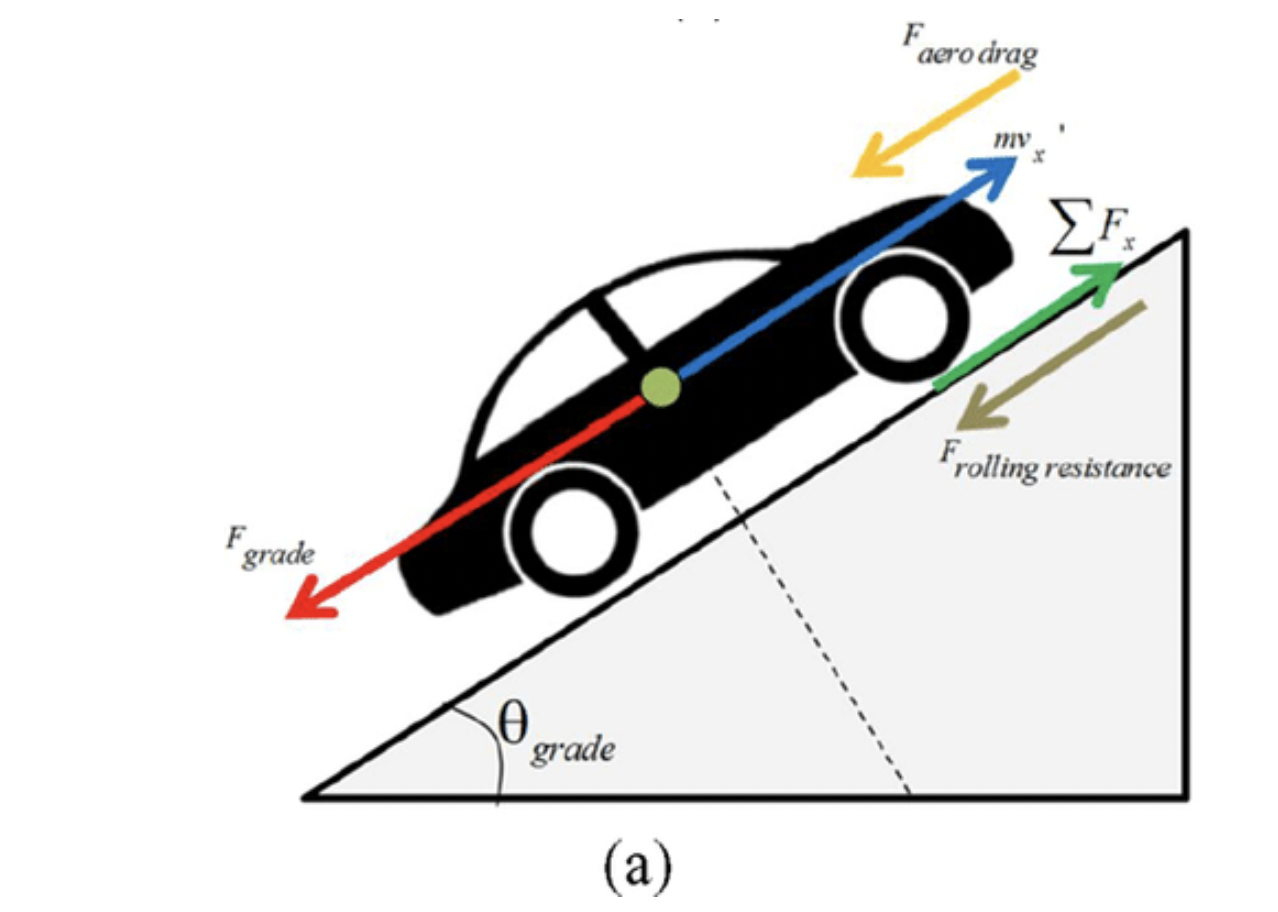


Figure showing the forces acting on a car on an incline (adapted from [2], only part (a) shown)

In [105]:
t = 0
v = 0.1
d = 0
theta = 0
N = m*g*np.cos(theta)

while d < 1000:
    f_drive = p/v
    f_drag = 0.5*c_drag*air*area*(v**2)
    f_rr = 0.01*N
    f_grav = m*g*np.sin(theta)
    if 0 < v < 1:
        f_net = f_drive - f_drag - f_grav
    else:
        f_net = f_drive - f_drag - f_rr - f_grav
    
    a = f_net/m
    v += a*dt
    t += dt
    d += v*dt
    
print(t)

35.22000000000156


Can see that when there is no incline (i.e theta = 0) the same value as in the flat road case is obtained so the dynamics are working.

 Testing the dynamics of the case where there is a constant incline

In [106]:
t = 0
v = 0.1
d = 0
theta = np.pi/12
N = m*g*np.cos(theta)

while d < 1000:
    f_drive = p/v
    f_drag = 0.5*c_drag*air*area*(v**2)
    f_rr = 0.01*N
    f_grav = m*g*np.sin(theta)
    if 0 < v < 1:
        f_net = f_drive - f_drag - f_grav
    else:
        f_net = f_drive - f_drag - f_rr - f_grav
    
    a = f_net/m
    v += a*dt
    t += dt
    d += v*dt
    
print(t)

86.06000000000712


This measured time is consistent with the expected range given the experimental constraints and assumptions.

### Date: 6/02/25

## Power rpm curves

"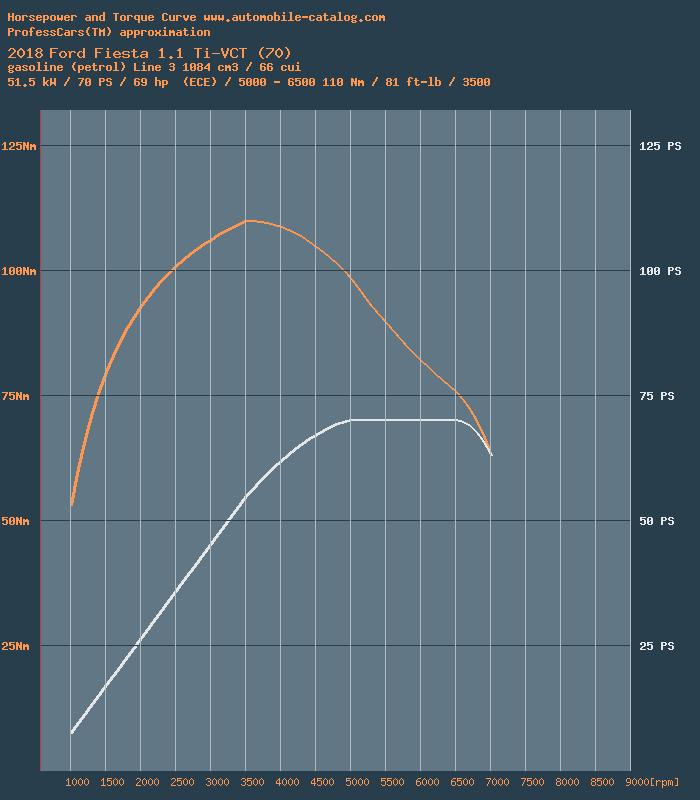[3]

this graph shows the power rpm curve in white and the torque rpm curve in orange 

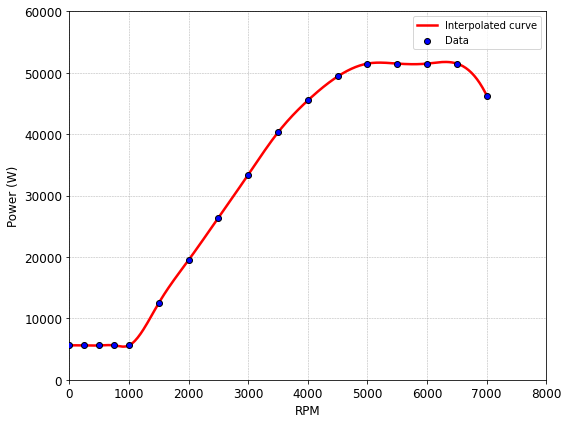

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def plot_power():
    po = np.array([5600,5600,5600,5600,5600,12500,19500,26400,33400,40300,45500,49400,51500,51500,51500,51500,46300])
    rpm = np.array([0,250,500,750,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000])

    # Create smoother curve using spline interpolation
    spline = make_interp_spline(rpm, po, k=3)  # Cubic spline
    rpm_smooth = np.linspace(rpm.min(), rpm.max(), 300)
    po_smooth = spline(rpm_smooth)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(rpm_smooth, po_smooth, color='red', linewidth=2.5, label='Interpolated curve')
    plt.scatter(rpm, po, color='blue', edgecolor='black', zorder=5, label='Data')

    # Axes and labels
    plt.xlim(0, 8000)
    plt.ylim(0, 60000)
    plt.xlabel('RPM', fontsize=12)
    plt.ylabel('Power (W)', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.savefig('engine_power_plot.png')

plot_power()


This version closely matches the actual power curve of the 2018 Ford Fiesta 1.1 Ti-VCT [3]. It follows the same rise, flat peak (around 5000–6500 rpm), and drop-off. I added a flat line at low RPMs (0-1000 rpm) to represent power at idle, which the original graph doesn’t show but makes the model more realistic.

In [108]:
def power(rpm):
    power_ = np.array([5600,5600,12500,19500,26400,33400,40300,45500,49400,51500,51500,51500,51500,46300])
    rpm_ = np.array([0,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,])
    x=np.interp(rpm,rpm_,power_)    
    return x 

power(3600)  

41340.0

### Date: 7/02/25

Now adding this function for power to see the comparitive 0-62mph time

In [109]:
v = 0.1
rpm= 0

c_drag = 0.321
air = 1.225
area = 2.15

m = 1620
dt = 0.01
time = 0
g = 9.81
N = g * m

while v <= 27.78:
    p = power(rpm)
    f_drive = p/v
    f_drag = 0.5*c_drag*air*area*(v**2)
    f_rr = 0.01*N
    if 0 < v < 1:
        f_net = f_drive - f_drag
    else:
        f_net = f_drive - f_drag - f_rr
        
    a = f_net/m
    v += a*dt
    time += dt
    if rpm < 6500:
        rpm += 50
    
print(time)

14.489999999999736


Using the power curve, the simulated 0–62 mph time came out as 14.49 seconds, which is very close to the manufacturer’s claimed 14.9 seconds. This shows that the power function accurately represents the engine’s performance.

## Creation of a gear module 

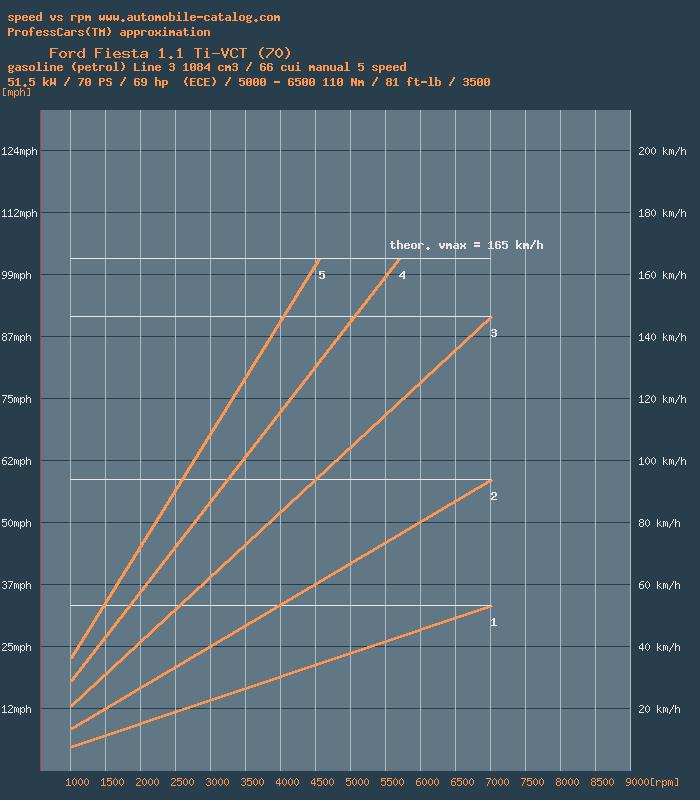 [4]

The aim of this module is to replicate the real gear ratios of the 2018 Ford Fiesta 1.1 Ti-VCT by following the official speed vs RPM curves. The car follows each gear linearly up to a certain speed, then shifts to the next gear—just like in real driving. After this point, gear changes are triggered based on speed thresholds to mimic realistic driver behavior

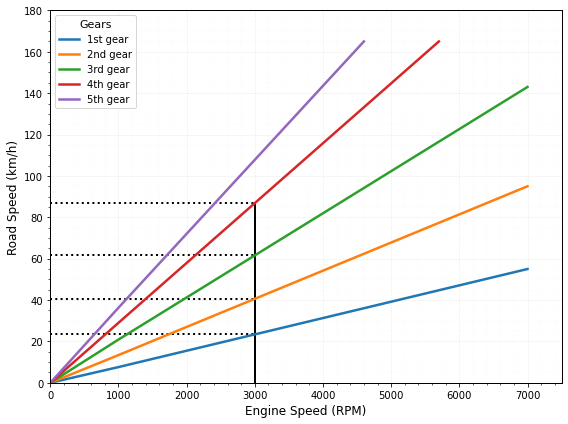

In [629]:

def plot_gear():
    gears = {
        '1st': ([0, 7.6, 55],    [0, 1000, 7000]),
        '2nd': ([0, 13.4, 95],   [0, 1000, 7000]),
        '3rd': ([0, 20.9, 143],  [0, 1000, 7000]),
        '4th': ([0, 29, 165],    [0, 1000, 5700]),
        '5th': ([0, 36.3, 165],  [0, 1000, 4600]),
    }
    marker_rpm = 3000

    fig, ax = plt.subplots(figsize=(8, 6))

    #plots each gear curve
    for name, (speed, rpm) in gears.items():
        ax.plot(rpm, speed, linewidth=2.5, label=f"{name} gear")

    #
    s4 = np.interp(marker_rpm, *gears['4th'][::-1])
    ax.vlines(marker_rpm, 0, s4, color='k', linewidth=2)

    for name, (speed, rpm) in gears.items():
        if name == '5th':
            continue
        y = np.interp(marker_rpm, rpm, speed)
        ax.hlines(y, 0, marker_rpm,
                  linestyle=':', linewidth=2, color='k')

    ax.set_xlabel('Engine Speed (RPM)', fontsize=12)
    ax.set_ylabel('Road Speed (km/h)', fontsize=12)
    ax.set_xlim(0, 7500)
    ax.set_ylim(0, 180)

    ax.minorticks_on()
    ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.3)
    ax.grid(which='minor', linestyle=':',  linewidth=0.3, alpha=0.2)

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1)

    ax.legend(title="Gears", fontsize=10, title_fontsize=11, loc='upper left')
    plt.tight_layout()
    plt.savefig('gear_speed_plot.png', dpi=300)

plot_gear()


Can see this is the same as the actual speed vs rpm curve but has been extrapolated to zero for each gear

In [111]:
def gear(v):
    speed_1 = np.array([0,7.6,55])/3.6
    rpm_1 = np.array([0,1000,7000])
    speed_2 = np.array([0,13.4,95])/3.6
    rpm_2 = np.array([0,1000,7000])
    speed_3 = np.array([0,20.9,143])/3.6
    rpm_3 = np.array([0,1000,7000])
    speed_4 = np.array([0,29,165])/3.6
    rpm_4 = np.array([0,1000,5700])
    speed_5 = np.array([0,36.3,165])/3.6
    rpm_5 = np.array([0,1000,4600])
    
    if 0 < v < 5:
        x=np.interp(v,speed_1,rpm_1) 
        return x
    if 5 <= v < 15:
        x=np.interp(v,speed_2,rpm_2) 
        return x
    if 15 <= v < 25:
        x=np.interp(v,speed_3,rpm_3) 
        return x
    if 25 <= v < 35:
        x=np.interp(v,speed_4,rpm_4) 
        return x
    if 35 <= v < 55:
        x=np.interp(v,speed_5,rpm_5) 
        return x
        
gear(15)

2626.5356265356268

You can see that the car follows the first gear curve up to around 5 m/s, then shifts to the second gear, and so on. This pattern continues, mimicking a realistic driving behavior rather than staying in each gear until its maximum theoretical speed.

In [112]:
v = 0.1
rpm= 0

c_drag = 0.321
air = 1.225
area = 2.15

m = 1620
dt = 0.01
time = 0
g = 9.81
N = g * m
rpm1 = []
while v <= 27.78:
    rpm = gear(v)
    p = power(rpm)
    rpm1.append(rpm)
    f_drive = p/v
    f_drag = 0.5*c_drag*air*area*(v**2)
    f_rr = 0.01*N
    if 0 < v < 1:
        f_net = f_drive - f_drag
    else:
        f_net = f_drive - f_drag - f_rr
        
    a = f_net/m
    v += a*dt
    time += dt
    
print(max(rpm1))    
print(time)

4393.979486112676
22.820000000000768


## Calc total energy

At each time step, the power is taken from the engine’s power curve based on the current RPM, and multiplied by the small time interval dt. By summing this over the duration of the drive, we get the total energy used. This total energy will be what we aim to minimize by adjusting the throttle input ( which will be implemented later).

In [113]:
v = 0.1
rpm= 0

c_drag = 0.321
air = 1.225
area = 2.15

m = 1620
dt = 0.01
time = 0
g = 9.81
N = g * m
powers = []

while v <= 27.78:
    rpm = gear(v)
    p = power(rpm)
    powers.append(p)
    f_drive = p/v
    f_drag = 0.5*c_drag*air*area*(v**2)
    f_rr = 0.01*N
    if 0 < v < 1:
        f_net = f_drive - f_drag
    else:
        f_net = f_drive - f_drag - f_rr
        
    a = f_net/m
    v += a*dt
    time += dt
    
E_total = np.sum(powers)*dt
print(E_total)

762039.6757616777


## week 3

Date: 12/02/25
### Supervisor Meeting
Supervisor: Prof. Simon Dye

What was Discussed:
1. Progress made throughout the week
2. How I implemented the gear module 
3. Making the gear module change by rpm not speed
4. How to make a throttle profile

What was agreed upon/ to be done:
1. Making the gear module change by RPM not speed
2. Making a throttle profile

Date: 12/02/25

### Making the gear module change by rpm not speed

Originally, gear changes were triggered at specific speeds, but to better reflect how real cars operate, the gear module has been updated to shift based on a defined shift_rpm value. This means the car will now change gear when the engine reaches a certain RPM, regardless of the current speed. This approach is more realistic, as drivers and automatic transmissions typically shift gears based on engine RPM rather than fixed speeds.

In [114]:
def gear(v,shift_rpm):
    speed_1 = np.array([7.6,55])/3.6
    rpm_1 = np.array([1000,7000])
    speed_2 = np.array([13.4,95])/3.6
    rpm_2 = np.array([1000,7000])
    speed_3 = np.array([20.9,143])/3.6
    rpm_3 = np.array([1000,7000])
    speed_4 = np.array([29,165])/3.6
    rpm_4 = np.array([1000,5700])
    speed_5 = np.array([36.3,165])/3.6
    rpm_5 = np.array([1000,4600])
    
    #speeds at which shift_rpm is reached
    swap_speed1 = np.interp(shift_rpm, rpm_1, speed_1)
    swap_speed2 = np.interp(shift_rpm, rpm_2, speed_2)
    swap_speed3 = np.interp(shift_rpm, rpm_3, speed_3)
    swap_speed4 = np.interp(shift_rpm, rpm_4, speed_4)
    swap_speed5 = np.inf  # No upper limit for 5th gear

    
    if 0 <= v < swap_speed1:
        x=np.interp(v,speed_1,rpm_1) 
        return x
    if swap_speed1  <= v < swap_speed2:
        x=np.interp(v,speed_2,rpm_2) 
        return x
    if swap_speed2 <= v < swap_speed3:
        x=np.interp(v,speed_3,rpm_3) 
        return x
    if swap_speed3 <= v < swap_speed4:
        x=np.interp(v,speed_4,rpm_4) 
        return x
    if swap_speed4 <= v < swap_speed5:
        x=np.interp(v,speed_5,rpm_5) 
        return x


In [115]:
t = 0
v = 0.1
d = 0
theta = 0
N = m*g*np.cos(theta)
d_f = 1000

while d < d_f:
    rpm = gear(v,4000)
    p = power(rpm)
    f_drive = p/v
    f_drag = 0.5*c_drag*air*area*(v**2)
    f_rr = 0.01*N
    f_grav = m*g*np.sin(theta)
    if 0 < v < 1:
        f_net = f_drive - f_drag - f_grav
    else:
        f_net = f_drive - f_drag - f_rr - f_grav
        
    
    a = f_net/m
    v += a*dt
    t += dt
    d += v*dt
    
print(t)

41.0500000000004


Date: 13/02/25

### creation of an throttle profile 

The throttle profile defines how much the driver is pressing the accelerator over time. Creating a throttle profile is important because it directly controls the engine's power output and, in turn, affects acceleration, speed, and energy usage. By simulating different throttle profiles, we can analyze how driving behavior influences efficiency and use this to optimize energy consumption for a given journey.

This is an example of what a throttle profile will look like.

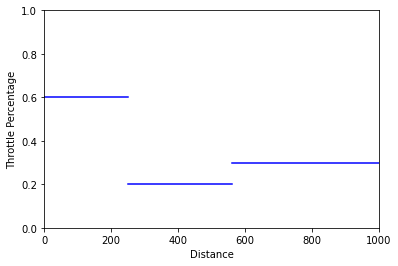

In [116]:
def throttle(d_f):
    distance1 = [0, 0.25 * d_f]
    distance2 = [0.25 * d_f, 0.56 * d_f]
    distance3 = [0.56 * d_f, d_f]

    percentage1 = [0.6, 0.6] 
    percentage2 = [0.2, 0.2]
    percentage3 = [0.3, 0.3]

    # Plotting
    plt.plot(distance1, percentage1, color='blue')
    plt.plot(distance2, percentage2, color='blue')
    plt.plot(distance3, percentage3, color='blue')

    plt.xlabel("Distance")
    plt.ylabel("Throttle Percentage")
    plt.xlim(0,d_f)
    plt.ylim(0,1)
    
throttle(1000)

In [117]:
def throttle(d,d_final):
    distance1 = [0, 0.25 * d_final]
    distance2 = [0.25 * d_final, 0.56 * d_final]
    distance3 = [0.56 * d_final, d_final]

    percentage1 = [0.6, 0.6]
    percentage2 = [0.2, 0.2]
    percentage3 = [0.3, 0.3]
    
    if 0 <= d < 0.25*d_final:
        return percentage1[0]
    if 0.25*d_final <= d < 0.56*d_final:
        return percentage2[0]
    if 0.56*d_final <= d <= d_final:
        return percentage3[0]
      
throttle(45,1000)

0.6

The throttle function checks how far the car has travelled and returns a set throttle value based on that. The journey is split into three parts, each with a different throttle percentage.

56.009999999997426


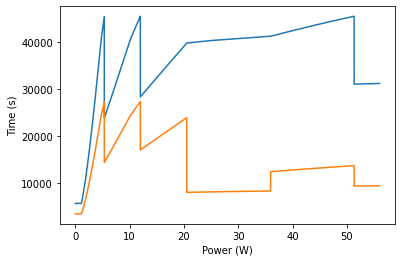

In [118]:
t = 0
v = 0.1
d = 0
theta = 0
N = m*g*np.cos(theta)
d_f = 1000

time = []
powerdata = []
truepowerdata = []

while d < d_f:
    rpm = gear(v,4000)
    profile = throttle(d,d_f)
    p = power(rpm)
    p_true = p*profile
    f_drive = p_true/v
    f_drag = 0.5*c_drag*air*area*(v**2)
    f_rr = 0.01*N
    f_grav = m*g*np.sin(theta)
    if 0 < v < 1:
        f_net = f_drive - f_drag - f_grav
    else:
        f_net = f_drive - f_drag - f_rr - f_grav
        
    time.append(t)
    truepowerdata.append(p_true)
    powerdata.append(p)
    
    a = f_net/m
    v += a*dt
    t += dt
    d += v*dt

plt.plot(time,powerdata)
plt.plot(time,truepowerdata)
plt.xlabel('Power (W)')
plt.ylabel('Time (s)')
    
print(t)

The graph shows that the throttle profile is working as intended — the orange line (true power) changes in steps that match the throttle values set for each distance segment, confirming the profile is being applied correctly during the simulation.

## Week 4:


Date: 20/02/25
### Supervisor Meeting
Supervisor: Prof. Simon Dye

What was discussed:
1. The addition of a velocity/time cosntraint with the implementation of a scaling factor
2. Generalise the throttle profile such that the percentages aren't hardcoaded
3. Progress made last week such as if I managed to change the gear module to change by rpm not speed
4. How much Work I've been doing a week and if its been too much.

What was agreed upon/ to be done:
1. Implementation of a time constraint
2. Changing the throttle profile so the percentages aren't hardcoaded into the function
    

Date: 24/02/25

## adding a target velocity/time constraint

In [119]:
theta = 0 #angle of incline
N = m*g*np.cos(theta) #normal force
d_f = 1000 #final distance
alpha = 1 #scaling factor
t_c = 45 #time constraint
v_target = d_f/t_c # target velocity
t = 0
v_avg=0
check = False
time =[]

while check == False:
    velocities = []
    if t_c - 0.5 < t < t_c+0.5: 
        check = True 
    if v_avg < v_target:
        alpha += 0.1
    if v_avg > v_target:
        alpha -= 0.1
    
    t = 0 #time
    v = 0.1 #velocity
    d = 0 #current distance
    
    while d < d_f:
        rpm = gear(v,4000)
        profile = min(throttle(d, d_f) * alpha, 1)
        p = power(rpm)
        p_true = p*profile
        f_drive = p_true/v
        f_drag = 0.5*c_drag*air*area*(v**2)
        f_rr = 0.01*N
        f_grav = m*g*np.sin(theta)
        if 0 < v < 1:
            f_net = f_drive - f_drag - f_grav
        else:
            f_net = f_drive - f_drag - f_rr - f_grav

        a = f_net/m
        v += a*dt
        t += dt
        d += v*dt
        velocities.append(v) 
    v_avg = np.mean(velocities)
    if time and t == time[-1]: 
        print('this time constraint is unrealistic')
        break
    time.append(t)
    
print(alpha)


2.100000000000001


This method implements a scaling factor, alpha, to adjust the throttle profile in order to meet a specified time constraint. While functional, its efficiency is highly sensitive to the proximity of the initial guess to the true value. When close, the runtime is approximately 2 seconds, but it can increase to around 20 seconds when the guess is far off. Additionally, the break condition may incorrectly trigger when t == time[-1], causing the loop to exit prematurely even when the time constraint is achievable.

## week 5:

Date: 26/02/25
### Supervisor Meeting
Supervisor: Prof. Simon Dye

What was discussed:
1. How the project progressed throughout this week.
2. The difficulty in implemeting the time constraint
3. How That we should be trying to minimise the difference between the average velocity of that journey and the target velocity
4. The fact that Scipy has an inbuilt root-finding function.
5. How to generalise the throttle profile
6. How the external optimiser should use the Nelder-Mead method to minimise energy usage.
    

What was agreed upon/ to be done:
1. Move away from the Grid search method 
2. To Generalise the throttle profile percentages

Date: 26/02/25

### changing finding the scaling factor away from a grid search method

The issue with using a grid search method is the runtime. if it takes 20s to find the correct value of alpha when combined with a simplex model it will far too long to find the optimal solution.

In [120]:
from scipy.optimize import newton
from scipy.optimize import minimize

In [121]:
theta = 0 #angle of incline
N = m*g*np.cos(theta) #normal force
d_f = 1000 #final distance
alpha = 1 #scaling factor
t_c = 45 #time constraint
v_target = d_f/t_c # target velocity
t = 0
v_avg = 0

def simulate(alpha):
    velocities= []   
    t = 0 #time
    v = 0.1 #velocity
    d = 0 #current distance

    while d < d_f:

        rpm = gear(v,4000)
        profile = min(throttle(d, d_f) * alpha, 1)
        p = power(rpm)

        p_true = p*profile
        f_drive = p_true/v
        f_drag = 0.5*c_drag*air*area*(v**2)
        f_rr = 0.01*N
        f_grav = m*g*np.sin(theta)
        if 0 < v < 1:
            f_net = f_drive - f_drag - f_grav
        else:
            f_net = f_drive - f_drag - f_rr - f_grav

        a = f_net/m
        v += a*dt
        t += dt
        d += v*dt
        velocities.append(v)
    
    v_avg = np.mean(velocities)
    v_mod = abs(v_avg-v_target)

    return v_mod


In [122]:
newton(simulate,x0=1,tol = 0.1)

2.1174988249981976

This returns the same value of alpha as the grid search method. 

## generalizing the throttle profile

In [369]:
def throttle(d,d_final,N):

    segment_length = d_final / N
    percentages = np.random.rand(N) 
    idx = int(d // segment_length)
    if idx >= N:  
        idx = N - 1
    return percentages[idx]
    
    
throttle(1,1000,3) 

0.725997674875544

This now does't have hard coaded throttle profile segments values  and the number of throttle profile segments can be varied

# Week 6:

Date: 05/03/25
### Supervisor Meeting
Supervisor: Prof. Simon Dye

What was discussed: 
1. If I had implemented the a generalised throttle profile
2. The issue with using the scipy function for root finding.
3. creation of my own root finder 
4. Use of my own created own root finder with a simplex model to minimise energy

What was agreed upon/ to be done:
1. Creation of my own root finder
2. creation of a function to minimise energy

Date: 05/03/25

## creating my own optimiser

To get around this issue ill create my own function that uses the same method ( the secant method ) as scipy.optimize.newton.

The reason for moving away from the scipy function is that it provides an error when the given time constraint is unrealistic. While using this method is quicker than the grid search method for finding alpha, its immutable meaning i cant alter it in the way i want. 

In [28]:
def secant(f,x0,tol,max_iter):
    
    alpha0 = .001
    alpha1 = x0
    for i in range(max_iter):
        f_new = f(alpha1)
        f_old = f(alpha0)
        
        if f_new - f_old == 0:
            print('Division by zero encountered in secant method.')
            return alpha_next
        
        alpha_next = alpha1 - f_new * ((alpha1-alpha0)/(f_new-f_old))
        
        if abs(alpha_next - alpha1) < tol:
            return alpha_next
        
        alpha0,alpha1 = alpha1,alpha_next
        
    print('The given time constraint is unrealistic')
    return None 

The newton function from scipy has an issue is that it provides an error when alpha cant be found meaning if it was fed into another external optimiser it would just breakand return an error.

My optimiser uses the Secant method which is the same as the scipy optimiser Newton but now when it breaks it returns a value of alpha of None meaning it can be used at the same time as an external optimiser.

In [31]:
secant(simulate,1,0.1,10)

2.1156746647610323

This method provides a comparable value to both the grid search method and the scipy.optimize.newton function for the value alpha. While the runtime for scipy.optimise.newton function is around 1s and the user defined function is 2s so its not as quick the ability to not output an error means i can feed it into an optimiser. 

The user defined function (secant) is still much quicker than the grid search method which had a runtime of around 20s for some sceanrios making it not feasible to use for simulations of multiple journeys

In [90]:
theta = 0 #angle of incline
N = m*g*np.cos(theta) #normal force
d_f = 1000 #final distance
alpha = 1 #scaling factor
t_c = 45 #time constraint
v_target = d_f/t_c # target velocity
t = 0
v_avg = 0
segment_no = 3

def simulate(alpha):
    velocities= []   
    t = 0 #time
    v = 0.1 #velocity
    d = 0 #current distance

    while d < d_f:

        rpm = gear(v,4000)
        profile = min(throttle(d, d_f,segment_no) * alpha, 1)
        p = power(rpm)

        p_true = p*profile
        f_drive = p_true/v
        f_drag = 0.5*c_drag*air*area*(v**2)
        f_rr = 0.01*N
        f_grav = m*g*np.sin(theta)
        if 0 < v < 1:
            f_net = f_drive - f_drag - f_grav
        else:
            f_net = f_drive - f_drag - f_rr - f_grav

        a = f_net/m
        v += a*dt
        t += dt
        d += v*dt
        velocities.append(v)
    
    v_avg = np.mean(velocities)
    v_mod = abs(v_avg-v_target)

    return v_mod

Date: 08/03/25

## creation of a system to minimise energy usage

In [392]:
def throttle(d,d_final,segment_no,percentage):
    segment_length = d_final / segment_no
    idx = int(d // segment_length)
    if idx < 0:
        idx=0
    if idx >= segment_no:  
        idx = segment_no - 1
    return percentage[idx]


Needed to change the throttle function to accept a throttle profile in this case its called percentage such that it can be used in an external optimiser.

In [393]:
d_f = 1000 #final distance
alpha = 1 #scaling factor
t_c = 60 #time constraint
t = 0
v_avg = 0
shift_rpm = 2500


def simulate(alpha,segment_no,percentage,theta,d_f,t_c):
    velocities= []   
    
    t = 0 #time
    v = 0.1 #velocity
    d = 0 #current distance
    v_target = d_f/t_c # target velocity
    N = m*g*np.cos(theta) #normal force
    f_grav = m*g*np.sin(theta) #gravitational force
    
    
    while d < d_f:

        rpm = gear(v,shift_rpm )
        profile = min(throttle(d, d_f,segment_no,percentage) * alpha, 1)
        p = power(rpm)

        p_true = p*profile
        
        f_drive = p_true/v
        f_drag = 0.5*c_drag*air*area*(v**2)
        f_rr = 0.01*N
        if 0 < v < 1:
            f_net = f_drive - f_drag - f_grav
        else:
            f_net = f_drive - f_drag - f_rr - f_grav
        
        a = f_net/m
        v += a*dt
        t += dt
        d += v*dt
        velocities.append(v)
    
    v_avg = np.mean(velocities)
    v_mod = abs(v_avg-v_target)

    return v_mod

I modified the simulate function to accept a custom throttle profile and added arguments for throttle scaling (theta), final distance (d_f), and time constraint (t_c). This makes it easier to test different driving conditions and adjust key parameters without changing the code manually.

In [125]:
def secant(f,x0,x1,tol,max_iter,segment_no,percentage,theta,d_f,t_c,f_tol):
    
    alpha0 = x0
    alpha1 = x1
    for i in range(max_iter):
        f_new = f(alpha1,segment_no,percentage,theta,d_f,t_c)
        f_old = f(alpha0,segment_no,percentage,theta,d_f,t_c)
        
        if abs(f_new) < f_tol:
            return alpha1
        
        if f_new - f_old == 0:
            return None
        
        
        alpha_next = alpha1 - f_new * ((alpha1-alpha0)/(f_new-f_old))
        
        if abs(alpha_next - alpha1) < tol:
            return alpha_next
        
        alpha0,alpha1 = alpha1,alpha_next
    
    return None

The updated secant method introduces theta, d_f, and t_c as arguments to support more complex physics-based functions, and adds f_tol to improve convergence checks by stopping early when the function value is sufficiently small. also added  x1 as part of the initial guess of alpha to speed up runtime.

In [244]:
theta = 0 #angle of incline
t = 0
v_avg = 0


def simulate_e(percentage,segment_no,theta,d_f,t_c):
    powers = []   
    t = 0 #time
    v = 0.1 #velocity
    d = 0 #current distance
    N = m*g*np.cos(theta) #normal force
    f_grav = m*g*np.sin(theta)
    
    alpha= secant(simulate,0.1,1,1e-3,30,segment_no,percentage,theta,d_f,t_c,1e-3)
    if alpha is None:
        alpha = np.inf
    while d < d_f:
        rpm = gear(v,shift_rpm)
        profile = min(throttle(d, d_f,segment_no,percentage) * alpha, 1)
        p = power(rpm)
        p_true = p*profile
        powers.append(p_true)
        f_drive = p_true/v
        f_drag = 0.5*c_drag*air*area*(v**2)
        f_rr = 0.01*N
        if 0 < v < 1:
            f_net = f_drive - f_drag - f_grav
        else:
            f_net = f_drive - f_drag - f_rr - f_grav
            
        a = f_net/m
        v += a*dt
        t += dt
        d += v*dt

    energy = np.sum(powers)*dt
    powers.clear()
    return energy

The simulate_e function calculates the total energy required to travel a distance d_f within a target time t_c, accounting for incline angle, throttle profiles, and resistive forces. It uses the secant method to determine an optimal throttle scaling factor (alpha) and iteratively updates velocity, position, and power consumption. This function will be fed into the simplex model as the objective to minimise energy use under given constraints.

In [248]:
segment_no = 3
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = [(0.001,1),(0.001,1),(0.001,1)]
d_f = 1000
t_c = 60
theta = np.radians(0)
dt= 0.02
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no,theta, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 30}
)

In [250]:
result.x

array([0.97233047, 0.03089256, 0.001     ])

# Week 7:

Date: 12/03/25
### Supervisor Meeting
Supervisor: Prof. Simon Dye

What was discussed:
1. The result for the optimal throttle profile
2. The energy saving between the optimal throttle profile and a flat throttle profile
3. Try energy saving for different time constraints.
4.  Look at increasing the number of throttle profile segments
5. Try different terrains i.e uphill,downhill

what was agreed upon/to be done:
1. Altering the number of iterations and the tolerance on the optimisers
2. Increasing the number of throttle profile segments
3. Look at the percentage energy saving

### changing values for the external optimiser to see effects on results

for this values for the tolerance and max iterations were changed 

In [621]:
#tolerence , maxiterations

In [157]:
result.x #1e-1 , 10

array([0.265, 0.06 , 0.001])

In [159]:
result.x  #1e-1 , 25

array([0.97233047, 0.03089256, 0.001     ])

In [161]:
result.x  #1e-1 , 50

array([0.9728146 , 0.03097595, 0.001     ])

In [163]:
result.x #1e-3, 10

array([0.265, 0.06 , 0.001])

In [165]:
result.x #1e-3, 25

array([0.97233047, 0.03089256, 0.001     ])

In [167]:
result.x #1e-3, 50

array([0.9728146 , 0.03097595, 0.001     ])

Changing the tolerance doesn't affect the throttle profile but the number of iterations does.

### seeing the effect of changing the internal optimiser 

In [202]:
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = [(0.001,1),(0.001,1),(0.001,1)]
d_f = 1000
t_c = 60
segment_no = 3
theta = np.radians(0)
dt= 0.02
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no,theta, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 30}
)

For this the external optimiser has the tolerance of 1e-3 and the max iterations of 30

In [629]:
#tolerance , max iterations

In [172]:
result.x   #1e-1, 10 

array([0.57761838, 0.19314442, 0.001     ])

In [176]:
result.x   #1e-1, 25

array([0.57761838, 0.19314442, 0.001     ])

In [179]:
result.x   #1e-1, 50

array([0.57761838, 0.19314442, 0.001     ])

In [189]:
result.x   #1e-3, 10 

array([0.1, 0.1, 0.1])

In [197]:
result.x   #1e-3, 25

array([0.81330156, 0.02441735, 0.001     ])

In [182]:
result.x   #1e-3, 50 

array([0.81330156, 0.02441735, 0.001     ])

In [192]:
result.x   #1e-5, 10 

array([0.1, 0.1, 0.1])

In [200]:
result.x   #1e-5, 25 

array([0.11261062, 0.15509416, 0.001     ])

In [203]:
result.x   #1e-5, 50 

array([0.97233047, 0.03089256, 0.001     ])

## Comparison of the the optimal throttle profile with a flat throttle profile

The relevence of this is to prove that the model is working such that the optimised profile does have a lower energy than a flat profile

In [251]:
flat = np.ones(3)*0.1

flat_e = simulate_e(flat,3,0,1000,60)
optimal_e = simulate_e(result.x,3,0,1000,60)

print(flat_e, optimal_e)

777344.8553030854 481076.89799288224


Can see that the flat profile uses signifcantly more energy than the optimal solution and they both satisfy the time constraint 

### Percentage energy difference 

In [252]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

38.112808657450856

The optimised throttle profile shows a significant reduction in total energy consumption when compared to a flat throttle profile, in which the input remains constant throughout the journey. In the optimised case, a large proportion of energy is used at the start, with a gradual decrease in throttle input towards the end. This front-loaded strategy appears to be more energy-efficient, as it takes advantage of early acceleration and minimises power usage during later stages of the journey, reducing overall energy expenditure while maintaining the rquired speed given the time constraint.

Now tests will be run on a range of differing sceanrios to see if this holds true. Some examples include changing the terrain, and number of throttle segments.

## finding the optimal number of throttle segmnets

Up to this point, the number of throttle profile segments has been three. In the following section, the effects of altering this will be examined.

Trying 10 throttle segments

In [253]:
segment_no = 3 #number of throttle segments
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = np.array([(0.001, 1)] * segment_no)
d_f = 1000
t_c = 60
theta = np.radians(0)
dt= 0.05
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no,theta, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-5,
    options={'maxiter': 30}
)

In [254]:
result.x

array([1.   , 0.001, 0.001])

In [255]:
optimal = result.x

In [256]:
flat = np.ones(segment_no)*0.1

flat_e = simulate_e(flat,segment_no,0,1000,60)
optimal_e = simulate_e(optimal,segment_no,0,1000,60)

print(flat_e, optimal_e)

770098.1054796439 473116.5727458189


In [257]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

38.56411678208903

In [264]:
segment_no = 10 #number of throttle segments
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = np.array([(0.001, 1)] * segment_no)
d_f = 1000
t_c = 60
theta = np.radians(0)
dt= 0.05
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no,theta, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 100}
)

In [265]:
result.x

array([0.72715795, 0.16436363, 0.28131351, 0.00358586, 0.23623896,
       0.001     , 0.2893077 , 0.001     , 0.0017184 , 0.001     ])

In [266]:
flat = np.ones(segment_no)*0.1

flat_e = simulate_e(flat,segment_no,0,1000,60)
optimal_e = simulate_e(result.x,segment_no,0,1000,60)

print(flat_e, optimal_e)

770098.1054796439 536619.9329504847


In [267]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

30.317977783329425

Investigating how many throttle profile segments are needed to see the pulse and glide approach.

In [269]:
segment_no = 20 #number of throttle segments
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = np.array([(0.001, 1)] * segment_no)
d_f = 1000
t_c = 60
theta = np.radians(0)
dt= 0.05
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no,theta, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 200}
)

In [270]:
result.x

array([0.27017789, 0.17514008, 0.19467369, 0.08828478, 0.08244005,
       0.08037976, 0.19052259, 0.09726012, 0.06860061, 0.05369683,
       0.01925123, 0.001     , 0.13623058, 0.06162296, 0.04163357,
       0.05796862, 0.06116935, 0.14474331, 0.12159646, 0.11360647])

In [1557]:
flat_pro = np.ones(segment_no)*0.1

In [274]:
flat = np.ones(segment_no)*0.1

flat_e = simulate_e(flat,segment_no,0,1000,60)
optimal_e = simulate_e(result.x,segment_no,0,1000,60)

print(flat_e, optimal_e)

770098.1054796439 630423.4349428902


In [275]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

18.137256739485093

In [277]:
segment_no = 15 #number of throttle segments
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = np.array([(0.001, 1)] * segment_no)
d_f = 1000
t_c = 60
theta = np.radians(0)
dt= 0.05
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no,theta, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 150}
)

In [282]:
result.x

array([0.61199962, 0.33578075, 0.35288276, 0.20023083, 0.07394424,
       0.08698823, 0.001     , 0.34386555, 0.01111836, 0.001     ,
       0.001     , 0.001     , 0.05975495, 0.20610733, 0.001     ])

In [280]:
flat = np.ones(segment_no)*0.1

flat_e = simulate_e(flat,segment_no,0,1000,60)
optimal_e = simulate_e(result.x,segment_no,0,1000,60)

print(flat_e, optimal_e)

770098.1054796439 536806.701897825


In [281]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

30.293725165901677

In [285]:
segment_no = 15 #number of throttle segments
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = np.array([(0.001, 1)] * segment_no)
d_f = 1000
t_c = 60
theta = np.radians(0)
dt= 0.05
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no,theta, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 250}
)

In [290]:
result.x

array([0.88693613, 0.84452602, 0.91533672, 0.60839198, 0.03248622,
       0.11488791, 0.001     , 1.        , 0.001     , 0.0011338 ,
       0.001     , 0.00153951, 0.001     , 0.37077505, 0.001     ])

In [286]:
flat = np.ones(segment_no)*0.1

flat_e = simulate_e(flat,segment_no,0,1000,60)
optimal_e = simulate_e(result.x,segment_no,0,1000,60)

print(flat_e, optimal_e)

770098.1054796439 514860.7643975446


In [287]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

33.1434838322487

Using 3 throttle segments resulted in the highest energy savings in the simulation. With fewer segments, the optimisation process is simpler and more efficient, making it easier to find the optimal solution. In contrast, increasing the number of throttle segments significantly expands the solution space, requiring many more iterations to reach an optimal result. For both a high number and low number of throttle segments the journeys are frontloaded. However the Throttle behaviour for higher segment counts, a "pulse and glide" pattern emerges, alternating between bursts of throttle and coasting to conserve energy.

### Week 8

Date: 19/03/25
### Supervisor Meeting
Supervisor: Prof. Simon Dye

What was discussed:
1. try changing the time constraint
2. Validate the optimal solution is correct
3. Varied road profiles

What was agreed upon/to be done:
1. Plot a graph for changing the time constrint.
2. Validate optimal solution
3. Try varying road profiles

### seeing the effects of different time constraints on energy loss

We will conduct tests for a 1 km run under time constraints of 45 seconds and 80 seconds to analyze their effects on energy consumption.

In [297]:
segment_no = 3 #number of throttle segments
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = np.array([(0.001, 1)] * segment_no)
d_f = 1000
t_c = 60
theta = np.radians(0)
dt= 0.05
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no,theta, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 30}
)

In [298]:
result.x

array([1.   , 0.001, 0.001])

In [301]:
flat = np.ones(segment_no)*0.1

flat_e = simulate_e(flat,segment_no,0,1000,60)
optimal_e = simulate_e(result.x,segment_no,0,1000,60)

print(flat_e, optimal_e)

770098.1054796439 473116.5727458189


In [302]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

38.56411678208903

In [304]:
segment_no = 3 #number of throttle segments
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = np.array([(0.001, 1)] * segment_no)
d_f = 1000
t_c = 75
theta = np.radians(0)
dt= 0.01
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no,theta, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 30}
)

In [305]:
result.x

array([0.93814815, 0.001     , 0.001     ])

In [306]:
flat = np.ones(segment_no)*0.1

flat_e = simulate_e(flat,segment_no,0,1000,75)
optimal_e = simulate_e(result.x,segment_no,0,1000,75)

print(flat_e, optimal_e)

551422.892085258 343213.8008886226


In [307]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

37.75851423383476

### Validating that the optimal solution is the truly optimal soultion

The parameter space has multiple local minima, so the optimiser might not find the true global minimum. An initial throttle profile is guessed and run through the optimiser. If the resulting profile uses less energy than its neighbouring profiles, it is used as the new guess. If re-running the optimiser returns the same result, it is assumed to be the true solution.

In [1584]:
t_c = 60
d_f = 1000
theta = 0
segment_no = 3

In [1595]:
optimal=np.array([0.81204527, 0.001     , 0.001     ])


above_optimal = optimal.copy()
above_optimal[0] += 0.01
print(above_optimal)

below_optimal = optimal.copy()
below_optimal[0] -= 0.01
print(below_optimal)

print(simulate_e(optimal,theta,d_f,t_c), simulate_e(above_optimal,theta,d_f,t_c), simulate_e(below_optimal,theta,d_f,t_c))


[0.82204527 0.001      0.001     ]
[0.80204527 0.001      0.001     ]
493249.9207122213 493223.1058408226 493234.1715248909


In [1596]:
segment_no = 3 #number of throttle segments
bounds = np.array([(0.001, 1)] * segment_no)
d_f = 1000
t_c = 60
theta = np.radians(0)
dt= 0.01
result = minimize(
    simulate_e,
    optimal,
    args=(theta, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 30}
)

In [1597]:
result.x

array([0.85083115, 0.0010011 , 0.001     ])

In [310]:
optimal=np.array([0.85083115, 0.0010011 , 0.001     ])


above_optimal = optimal.copy()
above_optimal[0] += 0.01
print(above_optimal)

below_optimal = optimal.copy()
below_optimal[0] -= 0.01
print(below_optimal)

print(simulate_e(optimal,segment_no,theta,d_f,t_c))
print(simulate_e(above_optimal,segment_no,theta,d_f,t_c))
print(simulate_e(below_optimal,segment_no,theta,d_f,t_c))


[0.86083115 0.0010011  0.001     ]
[0.84083115 0.0010011  0.001     ]
343291.54415771953
343295.53441220254
343320.401685686


The optimiser consistently converges to the correct region of the parameter space, even if it doesn't reach the exact minimum. This indicates it has found the right solution “well,” with only small deviations from the true minimum likely due to resolution limits or stopping criteria.

### altering the distance the journey is run over

Testing the effect of altering the journey distance is not pursued here, as it would be too computationally intensive. Meaningful results would require adjusting multiple interdependent variables — such as the target time and number of segments — making the process complex and time-consuming beyond the scope of this project.

### addition of a damping factor into the secant function

A damping factor was introduced to the secant method after instability was observed when an angular component was added to the model. The method began to diverge or behave erratically, likely due to the initial energy guesses being too far apart in parameter space. The damping helps control step size, improving stability and ensuring convergence under these more sensitive conditions.

In [131]:
def secant(f,x0,x1,tol,max_iter,segment_no,percentage,theta,d_f,t_c,f_tol):
    
    alpha0 = x0
    alpha1 = x1
    for i in range(max_iter):
        f_new = f(alpha1,segment_no,percentage,theta,d_f,t_c)
        f_old = f(alpha0,segment_no,percentage,theta,d_f,t_c)
        
        if abs(f_new) < f_tol:
            return alpha1
        
        if f_new - f_old == 0:
            return None
        
        
        step = f_new * ((alpha1-alpha0)/(f_new-f_old))
        
        alpha_next = alpha1 - (0.5*step) #0.5 acts as a damping factor
        
        if abs(alpha_next - alpha1) < tol:
            return alpha_next
        
        alpha0,alpha1 = alpha1,alpha_next
    
    return None

### Week 9

Date: 26/03/25
### Supervisor Meeting
Supervisor: Prof. Simon Dye

What was discussed:
1. Why the secant method wasn't working properly.
2. The effects of the secant method not correctly working.
3. The tests for a gradient 
4. How to vary the gradient.
5. How the shift_rpm effects energy saving

What was agreed upon/to be done:
1. tests for varying road profile
2. creation of a user defined fucntion to find theta
3. velocity-time plots for the reuslts of the optimal profiles 
4. Plot of energy saving vs shift_rpm
5. Plots of the optimal throttle profiles.

### varying the road profile

Im going to try a road profile such that the car goes uphill. Then a test will be carried out on a car for a car going downhill.

In [139]:
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = np.array([(0.001, 1)] * segment_no)
d_f = 1000
t_c = 60
segment_no = 15
theta = np.radians(0)
dt = 0.05
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no,theta, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 150}
)

In [140]:
result.x

array([0.41388072, 0.18530872, 0.19938438, 0.16556679, 0.02652565,
       0.08230048, 0.14453508, 0.27018399, 0.15340084, 0.10230123,
       0.10103697, 0.02813954, 0.00129649, 0.10030488, 0.001     ])

In [141]:
flat = np.ones(segment_no)*0.1

flat_e = simulate_e(flat,segment_no,theta,d_f,t_c)
optimal_e = simulate_e(result.x,segment_no,theta,d_f,t_c)

print(flat_e, optimal_e)

769783.658247111 573518.888155852


In [142]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

25.49609464796606

Now trying a test for a car going downhill

In [143]:
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = np.array([(0.001, 1)] * segment_no)
d_f = 1000
t_c = 60
segment_no = 15
theta = np.radians(-1)
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no,theta, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 150}
)

In [144]:
result.x

array([0.3694654 , 0.39513307, 0.31830737, 0.17480475, 0.001     ,
       0.34430005, 0.001     , 0.001     , 0.02392756, 0.0312288 ,
       0.001     , 0.22085515, 0.001     , 0.001     , 0.001     ])

In [145]:
flat = np.ones(segment_no)*0.1

flat_e = simulate_e(flat,segment_no,theta,d_f,t_c)
optimal_e = simulate_e(result.x,segment_no,theta,d_f,t_c)

print(flat_e, optimal_e)

557388.280791141 341535.9721517011


In [146]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

38.7256632545387

In [147]:
segment_no = 15
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = np.array([(0.001, 1)] * segment_no)
d_f = 1000
t_c = 60
dt = 0.05
theta = np.radians(1)
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no,theta, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 150}
)

In [148]:
result.x

array([0.15266502, 0.09727737, 0.11910187, 0.13158151, 0.12030222,
       0.09548391, 0.07132455, 0.10734925, 0.07976434, 0.10811372,
       0.08467608, 0.07814291, 0.07960461, 0.07083653, 0.07591445])

In [312]:

flat = np.ones(segment_no)*0.1
optimal = np.array([0.15266502, 0.09727737, 0.11910187, 0.13158151, 0.12030222,
       0.09548391, 0.07132455, 0.10734925, 0.07976434, 0.10811372,
       0.08467608, 0.07814291, 0.07960461, 0.07083653, 0.07591445])

flat_e = simulate_e(flat,segment_no,theta,d_f,t_c)
optimal_e = simulate_e(optimal,segment_no,theta,d_f,t_c)

print(flat_e, optimal_e)

551422.892085258 500180.06169641257


In [313]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

9.29283697219494

The effect of road gradient on energy savings was investigated in this section. On a flat road, the energy saving was found to be 25.50%, serving as the baseline case.

When the vehicle travelled on a downhill gradient of 1, the energy saving increased significantly to 38.73%. This is due to gravitational assistance, which reduces the energy required from the vehicle to maintain its target speed.

On the other hand, for an uphill gradient of 1, the energy saving dropped to 9.52%. In this case, the vehicle must work against gravity, leading to higher energy consumption and therefore lower savings.

### Building a road profile function

So far, tests have been conducted using a road profile with a constant gradient. While this has provided insight into the impact of flat, uphill, and downhill conditions individually, the current model cannot yet address scenarios where the road gradient varies along the journey—for example, a segment that is downhill followed by a flat section.

To handle such cases, the model will be extended by introducing a user-defined function. This function will determine the gradient value (θ) at each point along the journey based on the vehicle’s current position. By checking how far the car has travelled, the function can return the appropriate gradient for that segment of road.

This approach will allow for more realistic road profiles and enable analysis of how changing terrain affects energy consumption.

In [588]:
def road_profile(d,d_f):
    if d < 500:
        theta = np.radians(0)
        return theta
    else:
        theta = np.radians (0)
        return theta

First a road profile with a known solution will be tested since we know the solution. This is to validate that its working as intended.

In [556]:
d_f = 1000 #final distance
alpha = 1 #scaling factor
t_c = 60 #time constraint
t = 0
v_avg = 0
shift_rpm = 2500


def simulate(alpha,segment_no,percentage,d_f,t_c):
    velocities= []   
    
    t = 0 #time
    v = 0.1 #velocity
    d = 0 #current distance
    v_target = d_f/t_c # target velocity
    
    
    while d < d_f:
        
        theta = road_profile(d,d_f)

        N = m*g*np.cos(theta) #moved inside the loop
        f_grav = m*g*np.sin(theta) #moved inside the loop

        rpm = gear(v,shift_rpm )
        profile = min(throttle(d, d_f,segment_no,percentage) * alpha, 1)
        p = power(rpm)

        p_true = p*profile
        
        f_drive = p_true/v
        f_drag = 0.5*c_drag*air*area*(v**2)
        f_rr = 0.01*N
        if 0 < v < 1:
            f_net = f_drive - f_drag - f_grav
        else:
            f_net = f_drive - f_drag - f_rr - f_grav
        
        a = f_net/m
        v += a*dt
        t += dt
        d += v*dt
        velocities.append(v)
    
    v_avg = np.mean(velocities)
    v_mod = abs(v_avg-v_target)

    return v_mod

In [557]:
def secant(f,x0,x1,tol,max_iter,segment_no,percentage,d_f,t_c,f_tol):
    
    alpha0 = x0
    alpha1 = x1
    for i in range(max_iter):
        f_new = f(alpha1,segment_no,percentage,d_f,t_c)
        f_old = f(alpha0,segment_no,percentage,d_f,t_c)
        
        if abs(f_new) < f_tol:
            return alpha1
        
        if f_new - f_old == 0:
            return None
        
        
        step = f_new * ((alpha1-alpha0)/(f_new-f_old))
        
        alpha_next = alpha1 - (0.5*step)
        
        if abs(alpha_next - alpha1) < tol:
            return alpha_next
        
        alpha0,alpha1 = alpha1,alpha_next
    
    return None

In [630]:

t = 0
v_avg = 0


def simulate_e(percentage,segment_no,d_f,t_c):
    powers = []   
    t = 0 #time
    v = 0.1 #velocity
    d = 0 #current distance
    
    
    alpha= secant(simulate,0.1,1,1e-3,30,segment_no,percentage,d_f,t_c,1e-3)
    if alpha is None:
        alpha = np.inf
    while d < d_f:
        theta = road_profile(d,d_f)
        N = m*g*np.cos(theta) #normal force
        f_grav = m*g*np.sin(theta)
        rpm = gear(v,shift_rpm)
        profile = min(throttle(d, d_f,segment_no,percentage) * alpha, 1)
        p = power(rpm)
        p_true = p*profile
        powers.append(p_true)
        f_drive = p_true/v
        f_drag = 0.5*c_drag*air*area*(v**2)
        f_rr = 0.01*N
        if 0 < v < 1:
            f_net = f_drive - f_drag - f_grav
        else:
            f_net = f_drive - f_drag - f_rr - f_grav
            
        a = f_net/m
        v += a*dt
        t += dt
        d += v*dt

    energy = np.sum(powers)*dt
    powers.clear()
    return energy

In [559]:
def VDplot(percentage,segment_no,d_f,t_c):
    powers = []   
    distance = []
    velocities = []
    times = []
    t = 0 #time
    v = 0.1 #velocity
    d = 0 #current distance
    
    
    alpha= secant(simulate,0.1,1,1e-3,30,segment_no,percentage,d_f,t_c,1e-3)
    if alpha is None:
        alpha = np.inf
    while d < d_f:
        theta = road_profile(d,d_f)
        N = m*g*np.cos(theta) #normal force
        f_grav = m*g*np.sin(theta)
        rpm = gear(v,shift_rpm)
        profile = min(throttle(d, d_f,segment_no,percentage) * alpha, 1)
        p = power(rpm)
        p_true = p*profile
        powers.append(p_true)
        velocities.append(v)
        distance.append(d)
        f_drive = p_true/v
        f_drag = 0.5*c_drag*air*area*(v**2)
        f_rr = 0.01*N
        if 0 < v < 1:
            f_net = f_drive - f_drag - f_grav
        else:
            f_net = f_drive - f_drag - f_rr - f_grav
            
        a = f_net/m
        v += a*dt
        t += dt
        d += v*dt

    energy = np.sum(powers)*dt
    powers.clear()
    return velocities,distance

In [525]:
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = np.array([(0.0001, 1)] * segment_no)
d_f = 1000
t_c = 60
segment_no = 15
dt=0.05
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 150}
)

In [526]:
result.x

array([0.41388072, 0.18530872, 0.19938438, 0.16556679, 0.02652565,
       0.08230048, 0.14453508, 0.27018399, 0.15340084, 0.10230123,
       0.10103697, 0.02813954, 0.00129649, 0.10030488, 0.001     ])

In [527]:
flat = np.ones(segment_no)*0.1

flat_e = simulate_e(flat,segment_no,d_f,t_c)
optimal_e = simulate_e(result.x,segment_no,d_f,t_c)

print(flat_e, optimal_e)

769783.658247111 573518.888155852


In [158]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

25.49609464796606

This is the same energy as before so can see its working as intended. Now will try a road profile going downhill then straight.

In [562]:

def road_profile(d, d_f):
    third = d_f / 3.0
    if d < third:
        theta = np.radians(0)
    elif third < d < 2 * third:
        theta = np.radians(-1)
    else:
        theta = np.radians(0)
        
    return theta

In [529]:
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = np.array([(0.001, 1)] * segment_no)
d_f = 1000
t_c = 60
segment_no = 15
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 150}
)

In [530]:
result.x

array([0.44748703, 0.14351114, 0.01873503, 0.26328284, 0.16201772,
       0.05394636, 0.05946593, 0.02927871, 0.02257522, 0.10685424,
       0.02322119, 0.00842729, 0.12258958, 0.1408943 , 0.00692279])

In [531]:
flat = np.ones(segment_no)*0.1

flat_e = simulate_e(flat,segment_no,d_f,t_c)
optimal_e = simulate_e(result.x,segment_no,d_f,t_c)

print(flat_e, optimal_e)

716100.0135372196 514935.9636537365


In [532]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

28.091613752361354

In [565]:
def road_profile(d, d_f):
    third = d_f / 3.0
    if d < third:
        theta = np.radians(0)
    elif third < d < 2 * third:
        theta = np.radians(1)
    else:
        theta = np.radians(0)
        
    return theta

In [535]:
percentage0 = np.ones(segment_no)*0.1  #  initial guess
bounds = np.array([(0.001, 1)] * segment_no)
d_f = 1000
t_c = 60
segment_no = 15
result = minimize(
    simulate_e,
    percentage0,
    args=(segment_no, d_f, t_c),  
    method='Nelder-Mead',       
    bounds=bounds,
    tol=1e-3,
    options={'maxiter': 150}
)

In [536]:
result.x

array([0.23706961, 0.3133911 , 0.1484451 , 0.17982976, 0.13132275,
       0.00870837, 0.0048007 , 0.06894822, 0.11220799, 0.0280642 ,
       0.18264628, 0.09086038, 0.02386199, 0.00119265, 0.00126646])

In [537]:
flat = np.ones(segment_no)*0.1

flat_e = simulate_e(flat,segment_no,d_f,t_c)
optimal_e = simulate_e(result.x,segment_no,d_f,t_c)

print(flat_e, optimal_e)

833708.3246212574 630873.6742996364


In [538]:
percent_diff  = ((flat_e - optimal_e) / flat_e )*100
percent_diff

24.32921014837726

## Plotting the throttle profiles and velocity-time graphs

Date: 24/04/25

First need to create a function to get velocity-time graphs

### flat road scenario

In [580]:
simulate_e(throttle_profile,15,1000,60)

3.3407515659232363


573518.4273293759

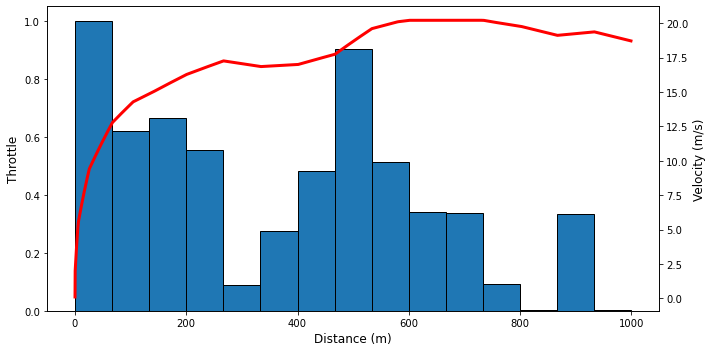

In [631]:
throttle_profile = np.clip(
    np.array([
        0.41388072, 0.18530872, 0.19938438, 0.16556679, 0.02652565,
        0.08230048, 0.14453508, 0.27018399, 0.15340084, 0.10230123,
        0.10103697, 0.02813954, 0.00129649, 0.10030488, 0.001
    ]) * 3.3407515659232363,
    None, 1
)

num_segments = len(throttle_profile)
edges = np.linspace(0, 1000, num_segments + 1)
centers = (edges[:-1] + edges[1:]) / 2
width = 1000 / num_segments

velocities, distances = VDplot(throttle_profile, 15, 1000, 60)

fig, ax1 = plt.subplots(figsize=(10, 5))
bars = ax1.bar(centers, throttle_profile, width=width, edgecolor='black', label='Throttle Profile')
ax1.set_xlabel('Distance (m)',fontsize=12)
ax1.set_ylabel('Throttle',fontsize=12)

ax2 = ax1.twinx()
line, = ax2.plot(distances, velocities, color='red', linewidth=3, label='Velocity')
ax2.set_ylabel('Velocity (m/s)',fontsize=12)


fig.tight_layout()
plt.savefig('Flat.png')
plt.show()

### downhill

In [491]:
simulate_e(throttle_,15,1000,60)

3.135878056187789


522777.21742153517

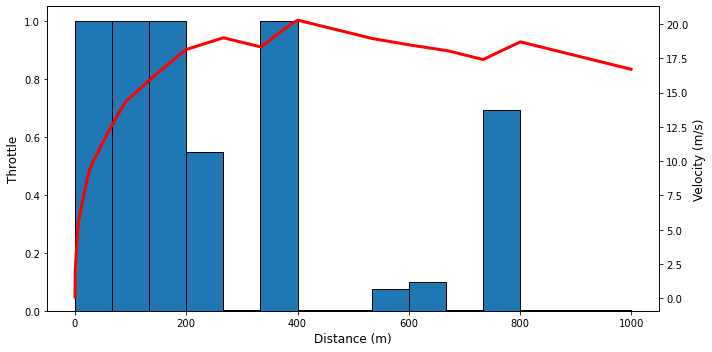

In [632]:
throttle_ = np.array([0.3694654 , 0.39513307, 0.31830737, 0.17480475, 0.001     ,
       0.34430005, 0.001     , 0.001     , 0.02392756, 0.0312288 ,
       0.001     , 0.22085515, 0.001     , 0.001     , 0.001     ])

throttle_profile = np.clip(
    throttle_ * 3.135878056187789,
    None, 1
)

num_segments = len(throttle_profile)
edges = np.linspace(0, 1000, num_segments + 1)
centers = (edges[:-1] + edges[1:]) / 2
width = 1000 / num_segments

velocities, distances = VDplot(throttle_profile, 15, 1000, 60)

fig, ax1 = plt.subplots(figsize=(10, 5))
bars = ax1.bar(centers, throttle_profile, width=width, edgecolor='black', label='Throttle Profile')
ax1.set_xlabel('Distance (m)',fontsize=12)
ax1.set_ylabel('Throttle',fontsize=12)

ax2 = ax1.twinx()
line, = ax2.plot(distances, velocities, color='red', linewidth=3, label='Velocity')
ax2.set_ylabel('Velocity (m/s)',fontsize=12)


fig.tight_layout()
plt.savefig('downhill.png')
plt.show()

### uphill

In [494]:
simulate_e(throttle_,15,1000,60)

5.255809964090425


670338.933180998

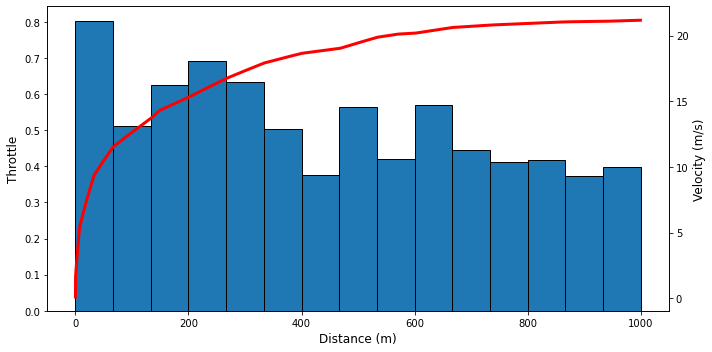

In [633]:
throttle_ = np.array([0.15266502, 0.09727737, 0.11910187, 0.13158151, 0.12030222,
       0.09548391, 0.07132455, 0.10734925, 0.07976434, 0.10811372,
       0.08467608, 0.07814291, 0.07960461, 0.07083653, 0.07591445])

throttle_profile = np.clip(
    throttle_ * 5.255809964090425,
    None, 1
)

num_segments = len(throttle_profile)
edges = np.linspace(0, 1000, num_segments + 1)
centers = (edges[:-1] + edges[1:]) / 2
width = 1000 / num_segments

velocities, distances = VDplot(throttle_profile, 15, 1000, 60)

fig, ax1 = plt.subplots(figsize=(10, 5))
bars = ax1.bar(centers, throttle_profile, width=width, edgecolor='black', label='Throttle Profile')
ax1.set_xlabel('Distance (m)',fontsize=12)
ax1.set_ylabel('Throttle',fontsize=12)

ax2 = ax1.twinx()
line, = ax2.plot(distances, velocities, color='red', linewidth=3, label='Velocity')
ax2.set_ylabel('Velocity (m/s)',fontsize=12)



fig.tight_layout()
plt.savefig('uphill.png')
plt.show()

## Flat downhill flat

In [563]:
simulate_e(throttle_,15,1000,60)

3.7727295006082975


514350.7606048047

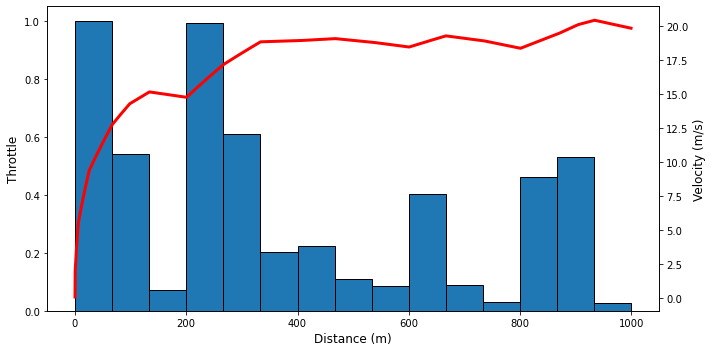

In [634]:
throttle_ = np.array([0.44748703, 0.14351114, 0.01873503, 0.26328284, 0.16201772,
       0.05394636, 0.05946593, 0.02927871, 0.02257522, 0.10685424,
       0.02322119, 0.00842729, 0.12258958, 0.1408943 , 0.00692279])

throttle_profile = np.clip(
    throttle_ * 3.7727295006082975,
    None, 1
)

num_segments = len(throttle_profile)
edges = np.linspace(0, 1000, num_segments + 1)
centers = (edges[:-1] + edges[1:]) / 2
width = 1000 / num_segments

velocities, distances = VDplot(throttle_profile, 15, 1000, 60)

fig, ax1 = plt.subplots(figsize=(10, 5))
bars = ax1.bar(centers, throttle_profile, width=width, edgecolor='black', label='Throttle Profile')
ax1.set_xlabel('Distance (m)',fontsize=12)
ax1.set_ylabel('Throttle',fontsize=12)

ax2 = ax1.twinx()
line, = ax2.plot(distances, velocities, color='red', linewidth=3, label='Velocity')
ax2.set_ylabel('Velocity (m/s)',fontsize=12)



fig.tight_layout()
plt.savefig('Flat_dh_flat.png')
plt.show()

In [570]:
## Flat uphill flat

In [568]:
simulate_e(throttle_,15,1000,60)

4.827458670898792


630873.674862978

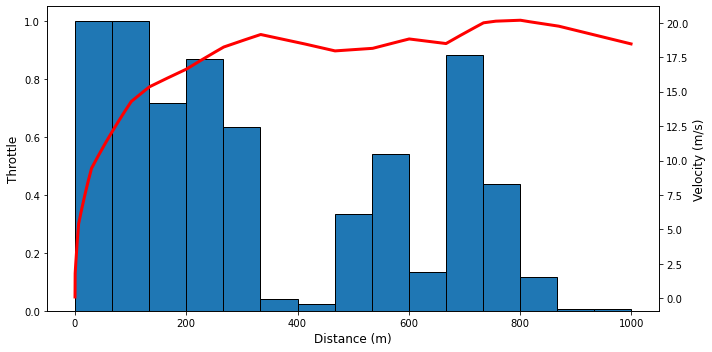

In [635]:
throttle_ = np.array([0.23706961, 0.3133911 , 0.1484451 , 0.17982976, 0.13132275,
       0.00870837, 0.0048007 , 0.06894822, 0.11220799, 0.0280642 ,
       0.18264628, 0.09086038, 0.02386199, 0.00119265, 0.00126646])

throttle_profile = np.clip(
    throttle_ * 4.827458670898792,
    None, 1
)

num_segments = len(throttle_profile)
edges = np.linspace(0, 1000, num_segments + 1)
centers = (edges[:-1] + edges[1:]) / 2
width = 1000 / num_segments

velocities, distances = VDplot(throttle_profile, 15, 1000, 60)

fig, ax1 = plt.subplots(figsize=(10, 5))
bars = ax1.bar(centers, throttle_profile, width=width, edgecolor='black', label='Throttle Profile')
ax1.set_xlabel('Distance (m)',fontsize=12)
ax1.set_ylabel('Throttle',fontsize=12)

ax2 = ax1.twinx()
line, = ax2.plot(distances, velocities, color='red', linewidth=3, label='Velocity')
ax2.set_ylabel('Velocity (m/s)',fontsize=12)



fig.tight_layout()
plt.savefig('Flat_uphill_flat.png')
plt.show()

## Energy saving vs shift_rpm

In [636]:
shifts=[1500,2000,2500,3000,3500,4000,4500,5000]

In [621]:
def road_profile(d,d_f):
    if d < 500:
        theta = np.radians(0)
        return theta
    else:
        theta = np.radians (0)
        return theta

In [623]:
for item in shifts:
    shift_rpm = item
    percentage0 = np.ones(segment_no)*0.1  #  initial guess
    bounds = np.array([(0.001, 1)] * segment_no)
    d_f = 1000
    t_c = 60
    segment_no = 15
    dt=0.05
    result = minimize(
        simulate_e,
        percentage0,
        args=(segment_no, d_f, t_c),  
        method='Nelder-Mead',       
        bounds=bounds,
        tol=1e-3,
        options={'maxiter': 150}
    )
    flat = np.ones(segment_no)*0.1

    flat_e = simulate_e(flat,segment_no,d_f,t_c)
    optimal_e = simulate_e(result.x,segment_no,d_f,t_c)
    percent_diff  = ((flat_e - optimal_e) / flat_e )*100

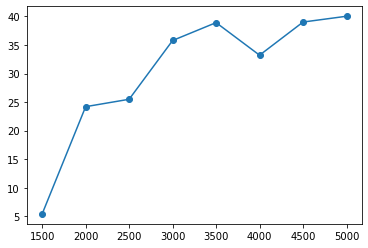

In [627]:
energy_saving_flat = [5.415644615539684,
24.20151989109048,
25.49609464796606,
35.792647480096754,
38.923119648777686,
33.21943651113502,
39.0226880045272,
40.04037996446445]
plt.plot(shifts,energy_saving_flat)
plt.scatter(shifts,energy_saving_flat)

In [638]:
energy_usage = []
for item in shifts:
    shift_rpm = item
    percentage0 = np.ones(segment_no)*0.1  #  initial guess
    bounds = np.array([(0.001, 1)] * segment_no)
    d_f = 1000
    t_c = 60
    segment_no = 15
    dt=0.05
    result = minimize(
        simulate_e,
        percentage0,
        args=(segment_no, d_f, t_c),  
        method='Nelder-Mead',       
        bounds=bounds,
        tol=1e-3,
        options={'maxiter': 150}
    )
    optimal_e = simulate_e(result.x,segment_no,d_f,t_c)
    energy_usage.append(optimal_e)

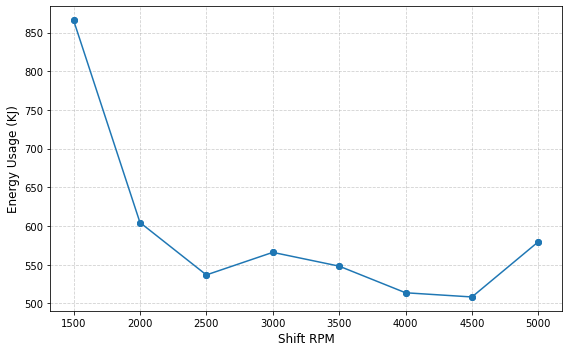

In [644]:
plt.figure(figsize=(8, 5))  
energy_usage1 = np.array(energy_usage) / 1000
plt.plot(shifts, energy_usage1, linestyle='-', marker='o', color='tab:blue', label='Energy Usage')
plt.scatter(shifts, energy_usage1, color='tab:blue')

plt.xlabel('Shift RPM', fontsize=12)
plt.ylabel('Energy Usage (KJ)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('energyRPM.png')

plt.show()

## Creation of road profile diagrams

Date: 04/05/2003

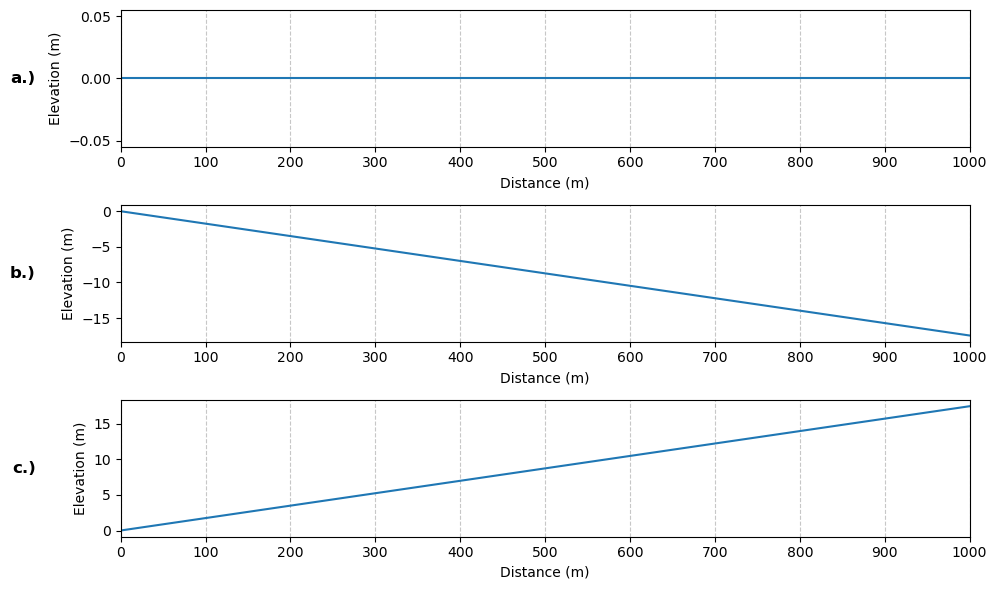

In [27]:
# Distance and slope setup
distance = np.linspace(0, 1000, 1001)
angle_rad = np.deg2rad(1)

# Elevation profiles
elevation_flat = np.zeros_like(distance)
elevation_downhill = -distance * np.tan(angle_rad)
elevation_uphill = distance * np.tan(angle_rad)

fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Labeling
labels = ['a.)', 'b.)', 'c.)']
profiles = [elevation_flat, elevation_downhill, elevation_uphill]

# Plot and label each subplot
for ax, profile, label in zip(axs, profiles, labels):
    ax.plot(distance, profile)
    ax.set_ylabel('Elevation (m)')
    ax.set_xlabel('Distance (m)')
    ax.set_xticks(np.arange(0, 1101, 100))
    ax.set_xlim(0, 1000)
    ax.tick_params(labelbottom=True)  # <-- this line ensures tick labels are shown
    ax.text(-0.1, 0.5, label, transform=ax.transAxes,
            fontsize=12, va='center', ha='right', fontweight='bold')
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('road_profiles.png', dpi=300)
plt.show()



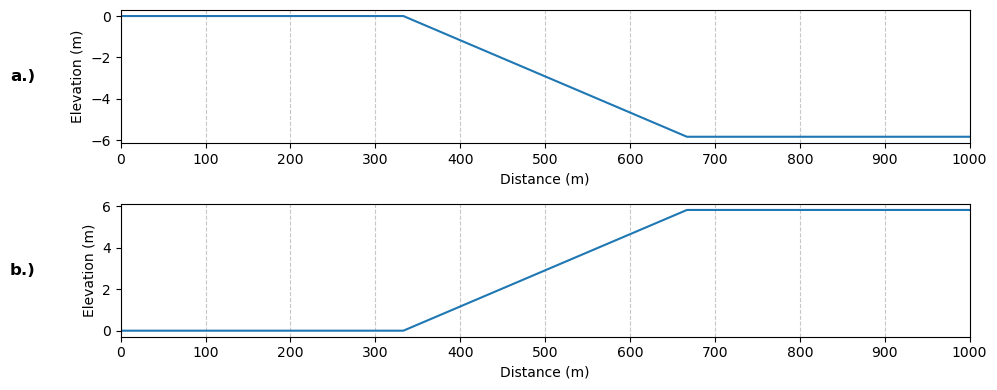

In [31]:
# Setup
distance = np.linspace(0, 1000, 1001)
angle_rad = np.deg2rad(1)

#segments
flat1_end = 333
slope_end = 667  # 333 + 334
flat2_start = 668

#Downhill
elevation_downhill = np.zeros_like(distance)
elevation_downhill[flat1_end:slope_end+1] = (distance[flat1_end:slope_end+1] - distance[flat1_end]) * -np.tan(angle_rad)
elevation_downhill[flat2_start:] = elevation_downhill[slope_end]

#uphill
elevation_uphill = np.zeros_like(distance)
elevation_uphill[flat1_end:slope_end+1] = (distance[flat1_end:slope_end+1] - distance[flat1_end]) * np.tan(angle_rad)
elevation_uphill[flat2_start:] = elevation_uphill[slope_end]

#setup plot
fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
labels = ['a.)', 'b.)']
profiles = [elevation_downhill, elevation_uphill]

#Plot each profile
for ax, profile, label in zip(axs, profiles, labels):
    ax.plot(distance, profile)
    ax.set_ylabel('Elevation (m)')
    ax.set_xlabel('Distance (m)')
    ax.set_xticks(np.arange(0, 1101, 100))
    ax.set_xlim(0, 1000)
    ax.tick_params(labelbottom=True)
    ax.text(-0.1, 0.5, label, transform=ax.transAxes,
            fontsize=12, va='center', ha='right', fontweight='bold')
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('mid_slope_profiles.png', dpi=300)
plt.show()



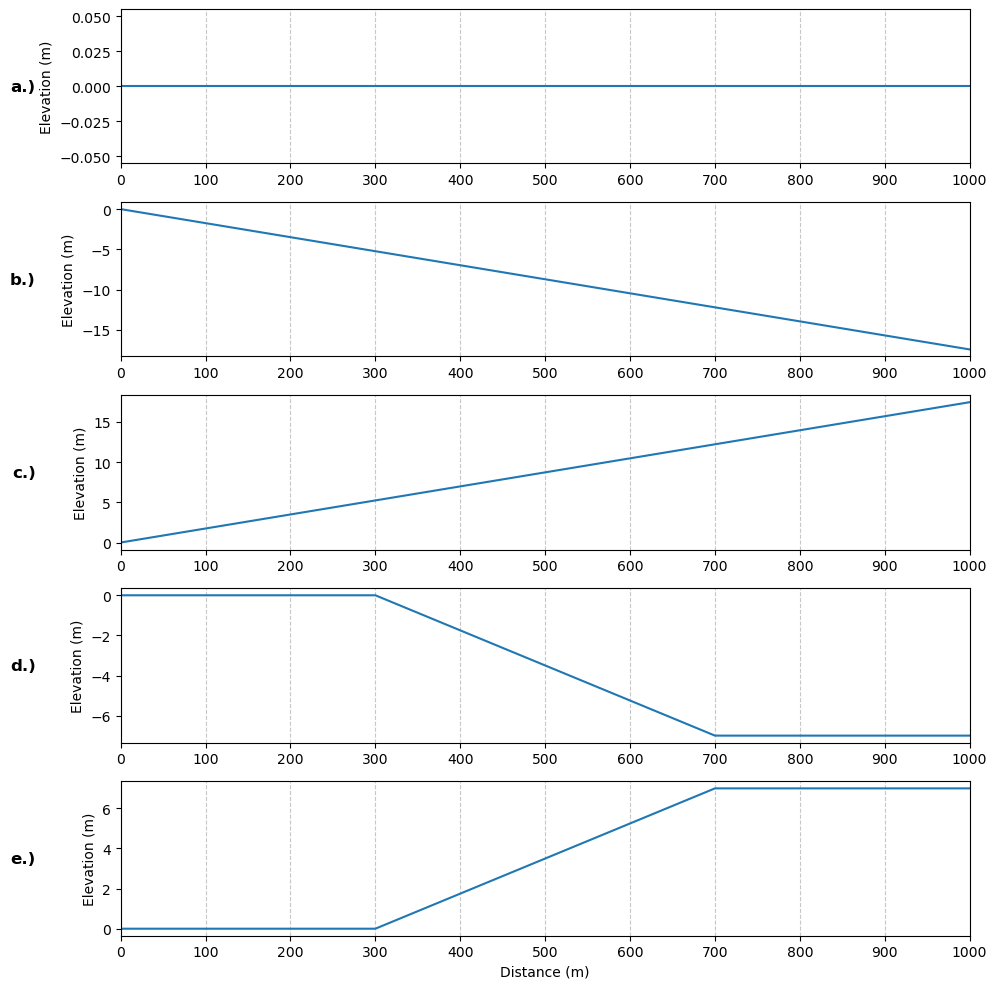

In [5]:
distance = np.linspace(0, 1000, 1001)
angle_rad = np.deg2rad(1)

# --- Simple profiles ---
elevation_flat = np.zeros_like(distance)
elevation_downhill = -distance * np.tan(angle_rad)
elevation_uphill = distance * np.tan(angle_rad)

# --- Varied profiles: flat → slope → flat ---
slope_distance = 400
flat_distance = (1000 - slope_distance) // 2  # = 300
slope_height = slope_distance * np.tan(angle_rad)

# Indices for varied slope section
i1 = flat_distance
i2 = flat_distance + slope_distance

# Initialize arrays
elevation_flat_down_flat = np.zeros_like(distance)
elevation_flat_up_flat = np.zeros_like(distance)

# Downhill section
elevation_flat_down_flat[i1:i2+1] = np.linspace(0, -slope_height, i2 - i1 + 1)
elevation_flat_down_flat[i2:] = -slope_height

# Uphill section
elevation_flat_up_flat[i1:i2+1] = np.linspace(0, slope_height, i2 - i1 + 1)
elevation_flat_up_flat[i2:] = slope_height

# --- Plotting ---
labels = [
    'a.)',
    'b.)',
    'c.)',
    'd.)',
    'e.)'
]
profiles = [
    elevation_flat,
    elevation_downhill,
    elevation_uphill,
    elevation_flat_down_flat,
    elevation_flat_up_flat
]

fig, axs = plt.subplots(len(profiles), 1, figsize=(10, 10), sharex=True)

for ax, profile, label in zip(axs, profiles, labels):
    ax.plot(distance, profile)
    ax.set_ylabel('Elevation (m)')
    ax.set_xticks(np.arange(0, 1101, 100))
    ax.set_xlim(0, 1000)
    ax.tick_params(labelbottom=True)
    ax.text(-0.1, 0.5, label, transform=ax.transAxes,
            fontsize=12, va='center', ha='right', fontweight='bold')
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

axs[-1].set_xlabel('Distance (m)')
plt.tight_layout()
plt.savefig('road_profiles_all.png', dpi=300)
plt.show()


## references

[1] FordFiesta2017_FiestaDrive_TechSpecs_EU
[2] Integrated state and parameter estimation for vehicle dynamics control - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/a-Longitudinal-vehicle-dynamics-model-and-b-simplified-wheel-dynamics-model-see_fig5_337911431 [accessed 5 Feb 2025]
[3] https://www.automobile-catalog.com/curve/2018/2562860/ford_fiesta_1_1_ti-vct_70.html#gsc.tab=0
[4] https://www.automobile-catalog.com/performance/2018/2562860/ford_fiesta_1_1_ti-vct_70.html#gsc.tab=0